In [30]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [31]:




results_agri = pd.read_csv(
    "Scenario_no_agri_3540.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



results_CMIP = pd.read_csv(
    "Reference_CMIP_3540.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



In [32]:
from ewatercycle.observation.grdc import get_grdc_data

grdc_chatly = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_kerki = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')





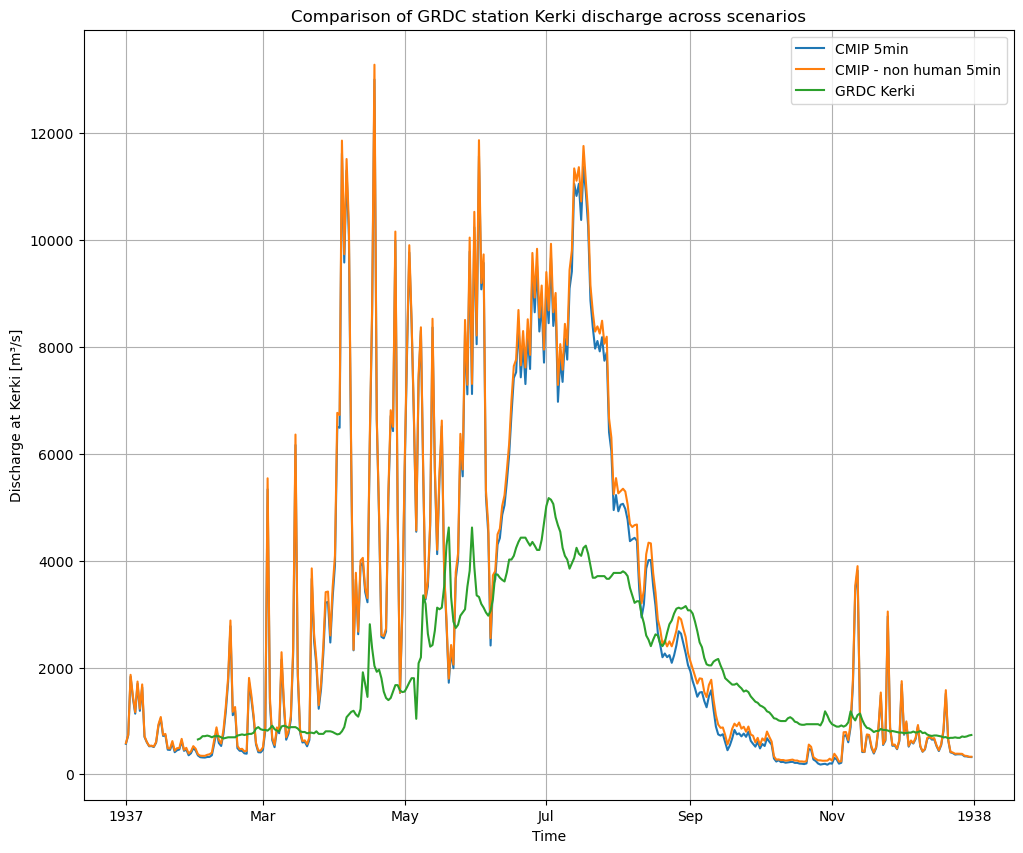

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(results_CMIP.loc['1937']['Kerki'], label='CMIP 5min')
plt.plot(results_agri.loc['1937']['Kerki'], label='CMIP - non human 5min')
# plt.plot(results_agri.loc['1971']['Kerki'], label='No Agriculture scenario')
# plt.plot(results_kwave.loc['1971']['Kerki'], label='Kinematic Wave')

grdc_kerki['streamflow'].sel(time=slice('1937', '1937')).plot(label='GRDC Kerki')


plt.xlabel('Time')
plt.ylabel('Discharge at Kerki [m³/s]')
plt.title('Comparison of GRDC station Kerki discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()


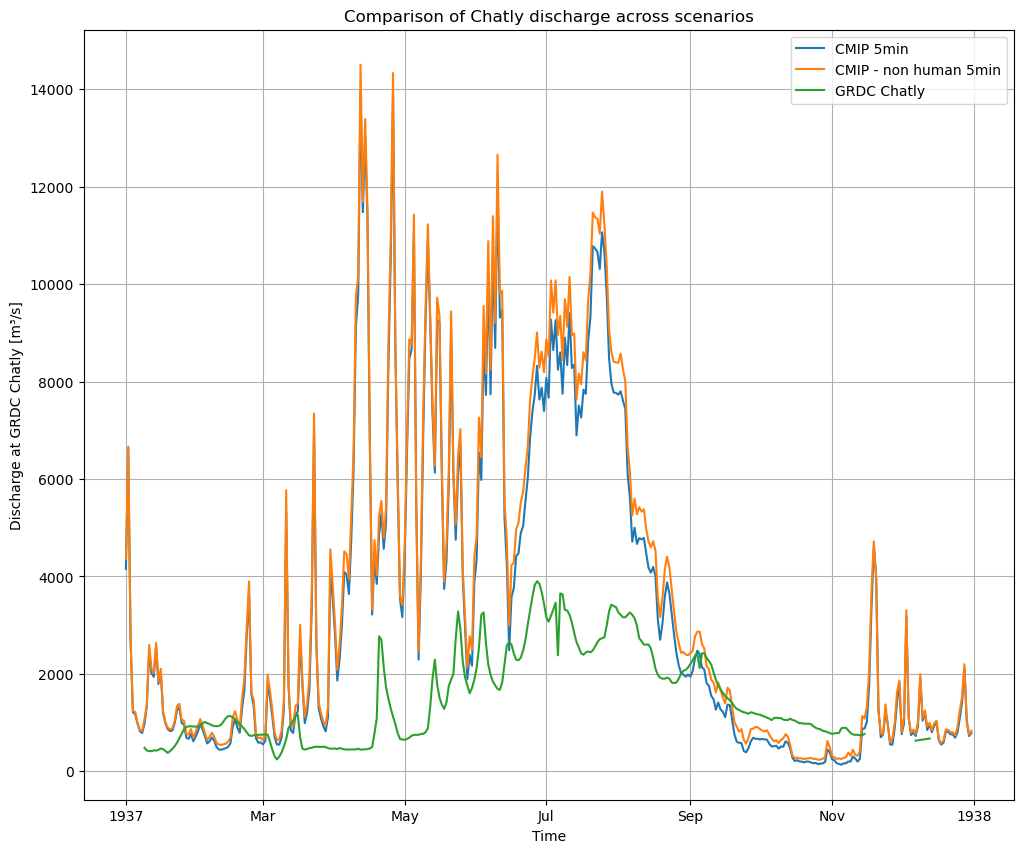

In [34]:
plt.figure(figsize=(12, 10))
plt.plot(results_CMIP.loc['1937']['Chatly'], label='CMIP 5min')
plt.plot(results_agri.loc['1937']['Chatly'], label='CMIP - non human 5min')

grdc_chatly['streamflow'].sel(time=slice('1937', '1937')).plot(label='GRDC Chatly')


plt.xlabel('Time')
plt.ylabel('Discharge at GRDC Chatly [m³/s]')
plt.title('Comparison of Chatly discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()

In [35]:
file_name_1 = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/pcrglobwb_20251106_013358/netcdf/discharge_dailyTot_output.nc'

In [36]:
import xarray as xr
ds_1 = xr.open_dataset(file_name_1)
print(ds_1)

<xarray.Dataset> Size: 614MB
Dimensions:    (time: 2192, lat: 216, lon: 324)
Coordinates:
  * time       (time) datetime64[ns] 18kB 1935-01-01 1935-01-02 ... 1940-12-31
  * lat        (lat) float32 864B 51.96 51.88 51.79 51.71 ... 34.21 34.12 34.04
  * lon        (lon) float32 1kB 53.04 53.12 53.21 53.29 ... 79.79 79.88 79.96
Data variables:
    discharge  (time, lat, lon) float32 614MB ...
Attributes:
    description:  by Edwin H. Sutanudjaja (contact: e.h.sutanudjaja@uu.nl)
    institution:  Department of Physical Geography, Utrecht University
    title:        PCR-GLOBWB 2 output (not coupled to MODFLOW)


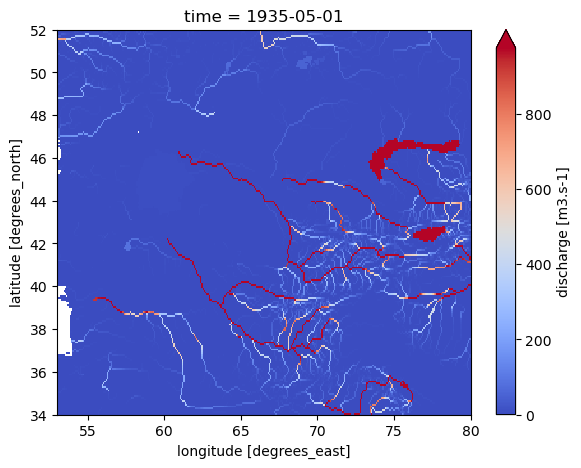

In [37]:
# get the first variable name
first_var = list(ds_1.data_vars)[0]

# select that variable and last timestep
da_1 = ds_1[first_var].isel(time=120)


#da_1 = ds_1[0].isel(time =-1)


da_1.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

Text(0.5, 0, 'Date')

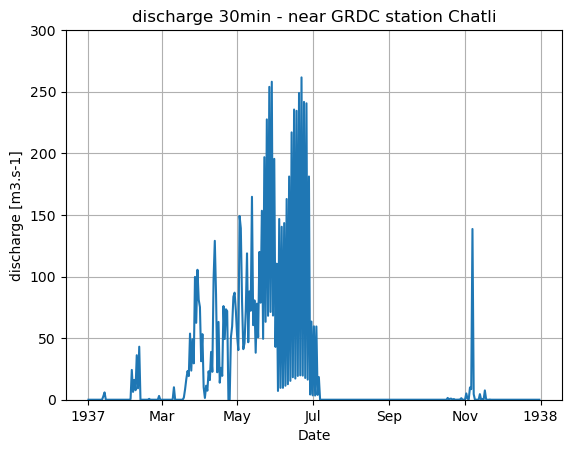

In [38]:
da_slice = ds_1[first_var].sel(lat=42.35144950637272,lon=59.6170672781565, method="nearest")
da_slice_kerki = ds_1[first_var].sel(lat=37.84142225056401,lon=65.23396486873717, method="nearest")
da_slice_dushanbe = ds_1[first_var].sel(
    lat=38.76042,
    lon=68.81458,
    method="nearest"
).sel(
    time=slice('1937-01-01', '1937-12-31')
)


#37.84142225056401, 65.23396486873717 Kerki
#da_slice.plot()
#da_slice_kerki.plot()
da_slice_dushanbe.plot()
plt.title('discharge 30min - near GRDC station Chatli')
plt.grid()
plt.ylim(0,300)
plt.xlabel('Date')

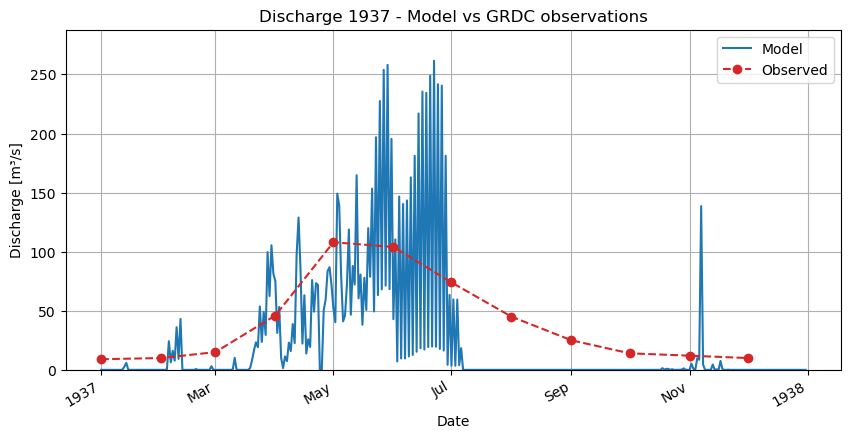

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Prepare observed discharge
obs_data = {
    "date": pd.date_range(start="1937-01-01", periods=12, freq="MS"),
    "discharge": [9, 10, 15, 46, 108, 104, 74, 45, 25, 14, 12, 10]
}
df_obs = pd.DataFrame(obs_data)
df_obs.set_index("date", inplace=True)

# 2️⃣ Plot model and observed together
plt.figure(figsize=(10, 5))

# Model data
da_slice_dushanbe.plot(label="Model", color="tab:blue")

# Observed data
df_obs["discharge"].plot(marker='o', linestyle='--', color="tab:red", label="Observed")

plt.title("Discharge 1937 - Model vs GRDC observations")
plt.xlabel("Date")
plt.ylabel("Discharge [m³/s]")
plt.legend()
plt.grid(True)
plt.ylim(0, max(df_obs["discharge"].max(), da_slice_dushanbe.max())*1.1)
plt.show()


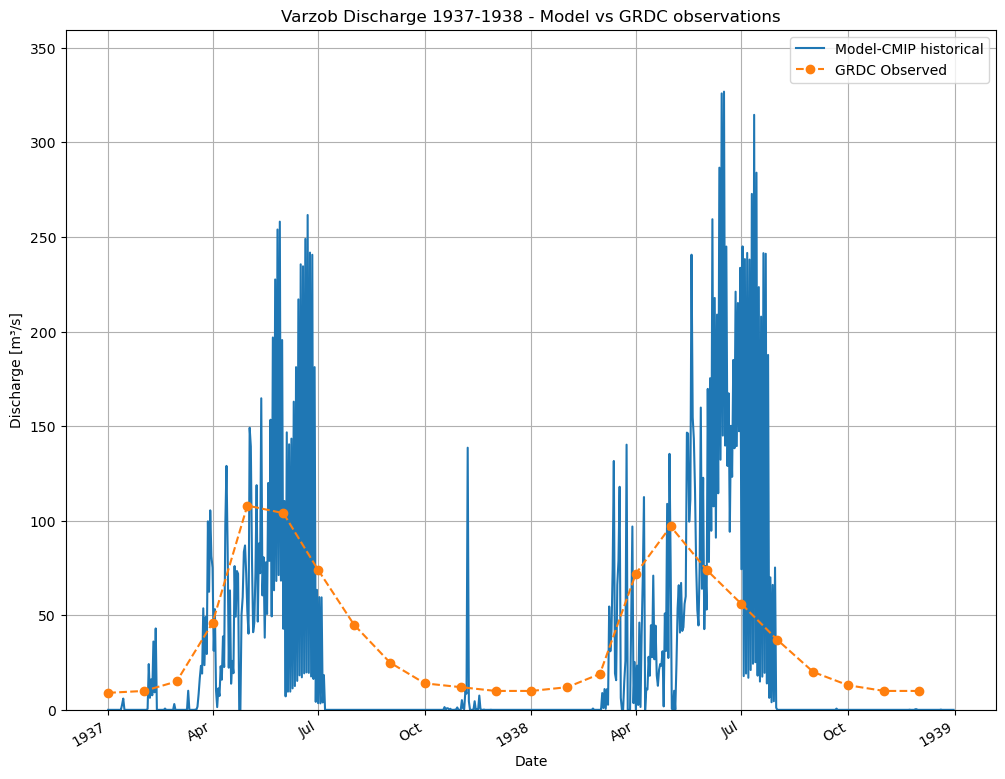

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Observed data for 1937-1938
obs_dates = pd.date_range(start="1937-01-01", periods=24, freq="MS")
obs_values = [
    9, 10, 15, 46, 108, 104, 74, 45, 25, 14, 12, 10,   # 1937
    10, 12, 19, 72, 97, 74, 56, 37, 20, 13, 10, 10    # 1938
]

df_obs = pd.DataFrame({"discharge": obs_values}, index=obs_dates)

# 2️⃣ Select model output for the same period (example: Dushanbe)
da_slice_dushanbe_2y = ds_1[first_var].sel(
    lat=38.76042,
    lon=68.81458,
    method="nearest"
).sel(
    time=slice('1937-01-01', '1938-12-31')
)


# 3️⃣ Plot model and observations together
plt.figure(figsize=(12, 10))

# Model
da_slice_dushanbe_2y.plot(label="Model-CMIP historical")

# Observed
df_obs["discharge"].plot(marker='o', linestyle='--', label="GRDC Observed")

plt.title("Varzob Discharge 1937-1938 - Model vs GRDC observations")
plt.xlabel("Date")
plt.ylabel("Discharge [m³/s]")
plt.legend()
plt.grid(True)
plt.ylim(0, max(df_obs["discharge"].max(), da_slice_dushanbe_2y.max())*1.1)
plt.show()
